# Tutorial on Image Clustering

by Joris Guérin

## 1 - Problem definition

**Input: ** Dataset of *unlabelled* images

**Outputs: ** Set of labels for the images

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## 2 - Motivations

## 3 - Clustering

### Toy data generation

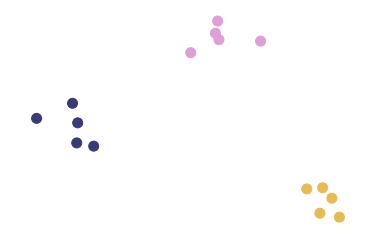

In [2]:
n_pts = 5

mean1, mean2, mean3 = np.array([2,3]), np.array([7,1]), np.array([5,6])
cov = np.array([[0.3, 0],[0, 0.3]])

group1 = np.random.multivariate_normal(mean1, cov, n_pts)
group2 = np.random.multivariate_normal(mean2, cov, n_pts)
group3 = np.random.multivariate_normal(mean3, cov, n_pts)

data   = np.r_[group1, group2, group3]
labels = np.array([0] * n_pts + [1] * n_pts + [2] * n_pts)

plt.scatter(data[:,0], data[:,1], c = labels, s=100, cmap = plt.get_cmap("tab20b"))
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset

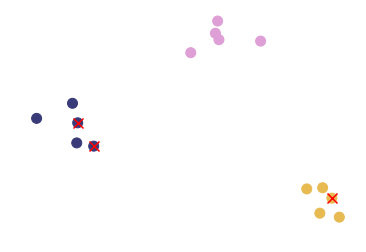

In [3]:
from copy import deepcopy

N_clusters = 3

data_shuffle = deepcopy(data)
np.random.shuffle(data_shuffle)

centroids = data_shuffle[:3, :]

plt.scatter(data[:,0], data[:,1], c = labels, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset
- Step 2: Maximization step, associate each point with the closest centroid

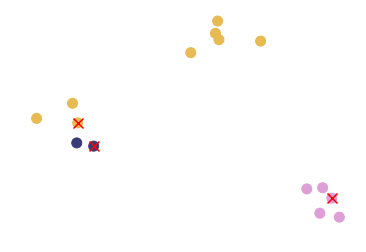

In [4]:
categories = []
for d in data:
    distances = np.linalg.norm((centroids - d)**2, axis = 1)
    categories.append(np.argmin(distances))
categories = np.array(categories)

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset
- Step 2: Maximization step, associate each point with the closest centroid
- Step 3: Expectation step, update the centroids by averaging the clusters

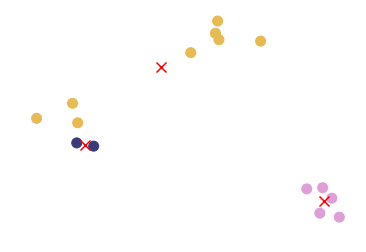

In [5]:
centroids = np.array([np.mean(data[categories == i], axis = 0) 
                for i in range(N_clusters)])

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset
- Repeat until convergence:
    - Maximization step, associate each point with the closest centroid
    - Expectation step, update the centroids by averaging the clusters

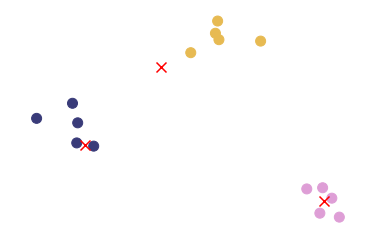

In [6]:
categories = []
for d in data:
    distances = np.linalg.norm((centroids - d)**2, axis = 1)
    categories.append(np.argmin(distances))
categories = np.array(categories)

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

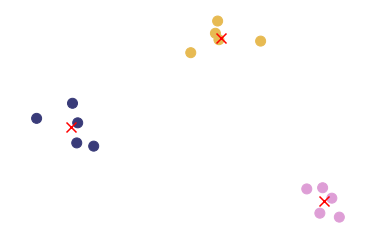

In [7]:
centroids = np.array([np.mean(data[categories == i], axis = 0) 
                for i in range(N_clusters)])

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

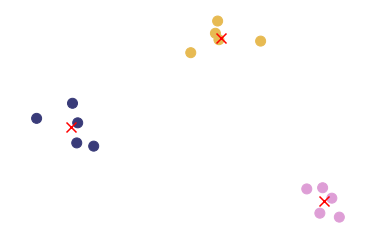

In [8]:
categories = []
for d in data:
    distances = np.linalg.norm((centroids - d)**2, axis = 1)
    categories.append(np.argmin(distances))
categories = np.array(categories)

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

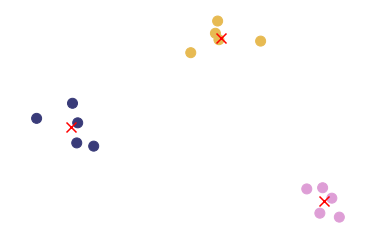

In [9]:
centroids = np.array([np.mean(data[categories == i], axis = 0) 
                for i in range(N_clusters)])

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### In practice

use scikit-learn library

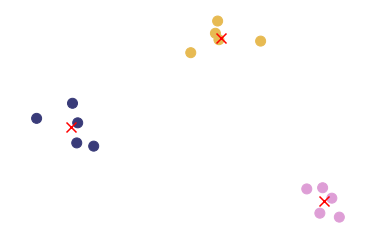

In [10]:
from sklearn.cluster import KMeans

km3 = KMeans(n_clusters = 3)
km3.fit(data)

categories = km3.predict(data)
centroids = km3.cluster_centers_

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### Evaluation

* Cannot use standard supervised accuracy

In [11]:
print("True labels:          ", labels)
print("Predicted categories: ", categories)

accuracy = np.sum(labels == categories)

print("Accuracy: ", accuracy)

True labels:           [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
Predicted categories:  [0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]
Accuracy:  5


### Evaluation

* Cannot use standard supervised accuracy
* Metric 1: purity

In [12]:
def confusion_matrix(clusters, true_labels):
    new_tl = deepcopy(true_labels)
    l = list(set(true_labels))
    for i in range(len(true_labels)):
        for j in range(len(l)):
            if true_labels[i] == l[j]:
                new_tl[i] = j
                
    conf_mat = np.zeros([len(set(clusters)), len(set(new_tl))])
    for i in range(len(clusters)):
        conf_mat[clusters[i], new_tl[i]] += 1

    return conf_mat

def purity(clusters, true_labels):
    conf_mat = confusion_matrix(clusters, true_labels)
    sum_clu  = np.max(conf_mat, axis = 1)
    sum_tot  = np.sum(sum_clu)

    pur = sum_tot / len(clusters)

    return pur

print("Purity: ", purity(labels, categories))

Purity:  1.0


### Evaluation

* Cannot use standard supervised accuracy
* Metric 1: purity
* Metric 2: Normalized mutual information (NMI)

In [14]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

from sklearn.metrics import normalized_mutual_info_score as NMI

print("NMI: ", NMI(labels, categories))

NMI:  1.0


### Evaluation

* Cannot use standard supervised accuracy
* Metric 1: purity
* Metric 2: Normalized mutual information (NMI)
* Metric 3: Fowlkes-Mallows index

In [15]:
from sklearn.metrics import fowlkes_mallows_score as FM

print("FM: ", FM(labels, categories))

FM:  1.0


## 4 - Clustering on raw images

### Studied dataset

** UMist **

* Face Database consists of 564 images of 20 individuals (mixed race/gender/appearance)
* 112 x 92, grayscale
* Different orientation for each person

*Wechsler, H., Phillips, J. P., Bruce, V., Soulie, F. F., & Huang, T. S. (Eds.). (2012). Face recognition: From theory to applications (Vol. 163). Springer Science & Business Media.*

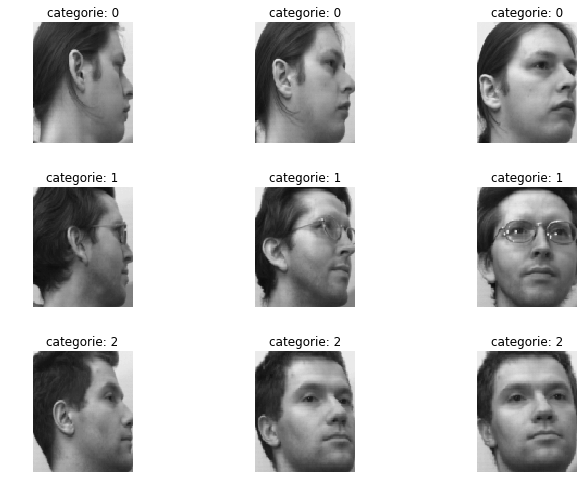

In [16]:
import cv2, matplotlib
matplotlib.rc('figure', figsize=(10, 7))

im_path, lab_path = "./umist/raw", "./umist"

fi = open("%s/true_labels.txt" % lab_path, "r")
true_labels = fi.readlines()
true_labels = np.array([int(lab.rstrip("\n")) for lab in true_labels])
fi.close()

indices = [0, 10, 20, 40, 50, 60, 80, 90, 95]
for i in range(len(indices)):
    im = cv2.imread("%s/%s.png" % (im_path, indices[i]))
    plt.subplot(331 + i)
    plt.imshow(im)
    plt.axis('off')
    plt.title('categorie: %i' % true_labels[indices[i]])
plt.tight_layout()

### Run K-means on raw data

* 575 images (112 x 92 -> 10304 feature dimesions)
* 20 classes

#### Read and format data

In [17]:
n_im = 575

data = []
for i in range(n_im):
    data.append(cv2.imread("%s/%s.png" % (im_path, i), cv2.IMREAD_GRAYSCALE).flatten())
data = np.array(data)

print("Shape dataset: ", data.shape)

Shape dataset:  (575, 10304)


### Run K-means on raw data

* 568 images (112 x 92 -> 10304 feature dimesions)
* 20 classes

#### Run K-means

In [67]:
n_cat = 20

km20 = KMeans(20)
preds_raw = km20.fit_predict(data)

print("purity: ", purity(preds_raw, true_labels))
print("NMI: ", NMI(preds_raw, true_labels))
print("FM: ", FM(preds_raw, true_labels))

eval_raw = [purity(preds_raw, true_labels), NMI(preds_raw, true_labels), FM(preds_raw, true_labels)]

purity:  0.48
NMI:  0.6362070838362667
FM:  0.34811140443834326


### Run K-means on raw data

* 568 images (112 x 92 -> 10304 feature dimesions)
* 20 classes

#### Visualize results

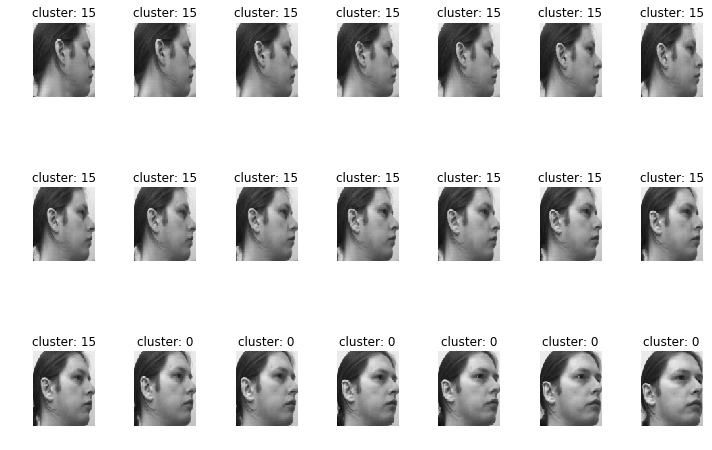

In [44]:
import pylab as pl

for i in range(21):
    im = cv2.imread("%s/%s.png" % (im_path, i))
    pl.subplot(3,7,1 + i)
    plt.imshow(im)
    plt.axis('off')
    plt.title('cluster: %i' % preds_raw[i])
plt.tight_layout()

## 5 - Clustering on classic computer vision features

### SIFT (visualize)

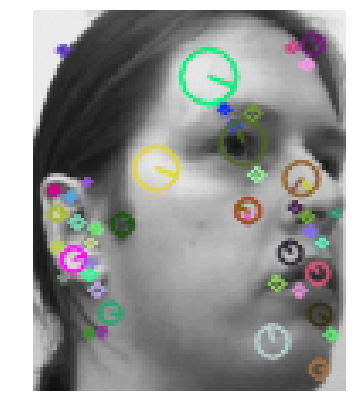

In [22]:
sift_extractor = cv2.xfeatures2d.SIFT_create()

image = cv2.imread("%s/%s.png" % (im_path, 20))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kp, desc = sift_extractor.detectAndCompute(image_gray, None)

img_sift = cv2.drawKeypoints(image_gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_sift)
plt.axis('off')
plt.show()

In [39]:
n_codewords = 500

all_sifts = []
images_sifts = []

for i in range(n_im):
    image = cv2.imread("%s/%s.png" % (im_path, i))
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kp, desc = sift_extractor.detectAndCompute(image_gray, None)
    for ll in list(desc):
        all_sifts.append(ll)
    images_sifts.append(desc)
    
all_sifts = np.array(all_sifts)

km = KMeans(n_codewords)
km.fit(all_sifts)

bof_matrix = np.zeros((n_im, n_codewords))
for i in range(n_im):
    for j in range(n_codewords):
        bof_matrix[i,j] = np.count_nonzero(km.predict(images_sifts[i]) == j)

In [95]:
preds_bof = km20.fit_predict(bof_matrix)

print("purity: ", purity(preds_bof, true_labels))
print("NMI: ", NMI(preds_bof, true_labels))
print("FM: ", FM(preds_bof, true_labels))

eval_bof = [purity(preds_bof, true_labels), NMI(preds_bof, true_labels), FM(preds_bof, true_labels)]

purity:  0.5356521739130434
NMI:  0.6100905530942552
FM:  0.2942874419245131


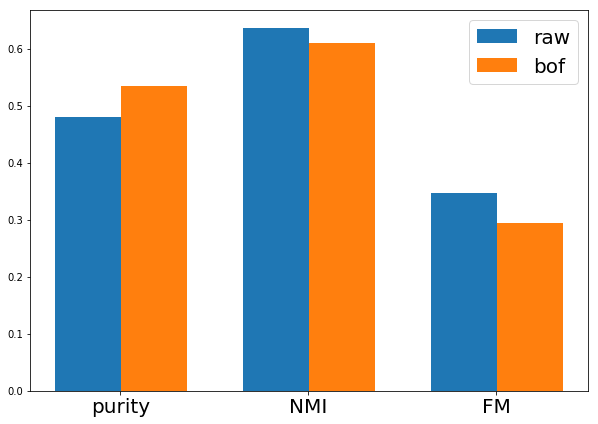

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar([0, 1, 2], eval_raw, 0.35)

rects2 = ax.bar([0.35, 1.35, 2.35], eval_bof, 0.35)

ax.legend( (rects1[0], rects2[0]), ('raw', 'bof'), fontsize=20)
xTickMarks = ['purity', 'NMI', 'FM']
ax.set_xticks([0.17, 1.17, 2.17])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
plt.show()